In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import ldspec
import zipfile

# autoreload
%load_ext autoreload
%autoreload 2

### Unfinished .ld files

In [2]:
SNP_RANGE_FILE="/n/groups/price/martin/LDSPEC_data/UKBimp_ss50K_MAF001_chimp/ukb_imp_v3.snp_range.txt"
SNP_RANGE_FILE_UF="/n/groups/price/martin/LDSPEC_data/UKBimp_ss50K_MAF001_chimp/ukb_imp_v3.snp_range.uf.txt"
LD_FILE="/n/scratch/users/j/jz286/imp_geno_ss50K_chimp.ldspec_ld_1e7/ukb_imp_v3_chimp.@_ld.npz"

snp_range_list = []
with open(SNP_RANGE_FILE, "r") as f:
    for line in f:
        snp_range_list.append(line.strip())

snp_range_uf_list = []
for snp_range in snp_range_list:
    ld_file = LD_FILE.replace("@", snp_range)
    if os.path.exists(ld_file):
        if zipfile.is_zipfile(ld_file):
            continue            
    snp_range_uf_list.append(snp_range)

with open(SNP_RANGE_FILE_UF, "w") as f:
    for snp_range in snp_range_uf_list:
        f.write("%s\n" % snp_range)
        
print("%d/%d unfinished" % (len(snp_range_uf_list), len(snp_range_list)))

0/1490 unfinished


### Correctness of LD¶

In [24]:
PGEN_FILE="/n/scratch/users/j/jz286/imp_geno_ss50K_chimp/ukb_imp_chr1_v3_chimp"
dic_data = ldspec.util.read_pgen(PGEN_FILE)
LD_FILE="/n/scratch/users/j/jz286/imp_geno_ss50K_chimp.ldspec_ld_1e7/ukb_imp_v3_chimp.c1_s0_e10000_ld.npz"
mat_ld, dic_range = ldspec.util.read_ld(LD_FILE)

In [23]:
df_pvar = pd.read_csv(
    '/n/groups/price/UKBiobank/insample_ld/pvar_files/ukb_imp_chr1_v3_chimp', sep='\t'.
)
LD_FILE_REF="/n/groups/price/UKBiobank/insample_ld/ld_files/ukb_imp_v3_chimp.c1_s0_e10000_ld.npz"
mat_ld_ref, dic_range_ref = ldspec.util.read_ld(LD_FILE_REF)

In [2]:
df_pvar = pd.read_csv(
    '/n/groups/price/UKBiobank/insample_ld/pvar_files/ukb_imp_chr1_v3_chimp.pvar', sep='\t',
)

### Unfinished .score.gz files¶

In [ ]:
# annot
SNP_RANGE_FILE="/n/groups/price/martin/LDSPEC_data/UKBimp_ss50K_MAF001_chimp/ukb_imp_v3.snp_range.txt"
SNP_RANGE_FILE_UF="/n/groups/price/martin/LDSPEC_data/UKBimp_ss50K_MAF001_chimp/ukb_imp_v3.snp_range.uf.txt"
SCORE_FILE="/n/scratch/users/j/jz286/imp_geno_ss50K_chimp.score/ukb_imp_v3.@_score.tsv.gz"

snp_range_list = []
with open(SNP_RANGE_FILE, "r") as f:
    for line in f:
        snp_range_list.append(line.strip())

snp_range_uf_list = []
for snp_range in snp_range_list:
    score_file = SCORE_FILE.replace("@", snp_range)
    if os.path.exists(score_file):
#         temp_df = pd.read_csv(score_file, sep="\t", index_col=None, nrows=5)
        temp_df = pd.read_csv(score_file, sep="\t", index_col=None)
        if temp_df.isna().sum().sum()==0:
            continue            
    snp_range_uf_list.append(snp_range)

with open(SNP_RANGE_FILE_UF, "w") as f:
    for snp_range in snp_range_uf_list:
        f.write("%s\n" % snp_range)
        
print("%d/%d unfinished" % (len(snp_range_uf_list), len(snp_range_list)))

In [5]:
# If scores are complete 
score_file = '/n/groups/price/martin/LDSPEC_data/UKBimp_ss50K_MAF001_chimp/baseline_sp.c@_score.tsv.gz'
pvar_file = '/n/scratch/users/j/jz286/imp_geno_ss50K_chimp/ukb_imp_chr@_v3_chimp.pvar'

for CHR in range(1,23):
    df_score = pd.read_csv(score_file.replace('@', '%d'%CHR), sep='\t')
    df_pvar = pd.read_csv(pvar_file.replace('@', '%d'%CHR), sep='\t')
    print('df_score', df_score.shape, 'df_pvar', df_pvar.shape)
    break

df_score (1159645, 305) df_pvar (1159645, 5)


In [3]:
# Compare score
score_file = '/n/groups/price/martin/LDSPEC_data/UKBimp_ss50K_MAF001_chimp/baseline_sp.c10_score.tsv.gz'
score_file_ref = '/n/groups/price/martin/LDSPEC_data/UKBimp_337K_MAF001_chimp/ldspec_score_file/'\
    'pannot_prox_ld.c10_score.tsv.gz'
# score_file_ref = '/n/groups/price/martin/LDSPEC_data/UKBimp_337K_MAF001_chimp/ldspec_score_file/'\
#     'baseline.c1_score.tsv.gz'

df_score = pd.read_csv(score_file, sep='\t', nrows=11000)
df_score_ref = pd.read_csv(score_file_ref, sep='\t', nrows=11000)

temp_set = set(df_score_ref.index)
snp_list = [x for x in df_score.index if x in temp_set]
df1 = df_score.loc[snp_list].copy()
df2 = df_score_ref.loc[snp_list].copy()
score_list = [x for x in set(df1)&set(df2) if 'LD:' in x]
print('%s (%d) vs. %s (%d); overlap=%d' % (
    'a', df_score.shape[0], 'b', df_score_ref.shape[0], len(snp_list)
))
for score in np.random.choice(score_list, size=5):
    print('%-50s abs_dif=%0.5e corr=%0.5f' % (
        score, 
        np.absolute(df1[score]-df2[score]).sum() / np.absolute(df1[score]).sum(), 
        np.corrcoef(df1[score], df2[score])[0,1]
    ))

print('')

a (11000) vs. b (11000); overlap=11000
DLD:pAN:proxy_100_1000_ld_n100_p0_maf_common_block abs_dif=1.00329e+00 corr=0.47328
DLD:pAN:proxy_1000_10000_ld_n100_p0_maf_common_block abs_dif=1.02997e+00 corr=0.44698
DLD:pAN:proxy_0_100_ld_p0_p100_maf_common_block    abs_dif=9.92299e-01 corr=0.48710
DLD:pAN:proxy_100_1000_ld_p0_p100_maf_lf_block     abs_dif=1.22157e+00 corr=0.30887
DLD:pAN:proxy_100_1000_ld_p0_p100_maf_lf_block     abs_dif=1.22157e+00 corr=0.30887



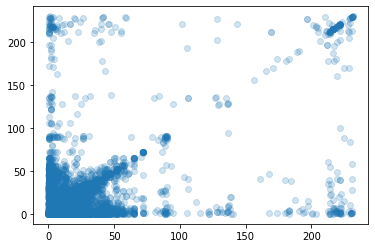

In [4]:
plt.figure()
plt.scatter(
    df1['DLD:pAN:proxy_0_100_ld_p0_p100_maf_common_block'], 
    df2['DLD:pAN:proxy_0_100_ld_p0_p100_maf_common_block'], alpha=0.2,
)
plt.show()

# plt.figure()
# plt.scatter(
#     df1['LD:AN:all'], 
#     df2['LD:AN:all'], alpha=0.2,
# )
# plt.show()

### AVGR

In [20]:
PANNOT_FILE_LIST = [
    '/home/jz286/WES_analysis/LDSPEC/experiments/job.analysis_imp_geno_chimp/reg_annot_file/'
    'reg_annot_file.ss50K.prox_gene_fct_all_ld.txt',
]
dic_avgr = {}
missing_list = []

for PANNOT_FILE in PANNOT_FILE_LIST:
    for fpath in pd.read_csv(PANNOT_FILE, header=None)[0]:
        if os.path.exists(fpath+'.avgr'):
            temp_df = pd.read_csv(fpath+'.avgr', header=None, sep='\t')
            dic_avgr[temp_df[0][0]] = temp_df[1][0]
        else:
            missing_list.append(fpath)
            print('Missing: %s' % fpath)
print('dic_avgr', len(dic_avgr))

with open("/n/groups/price/martin/LDSPEC_data/UKBimp_ss50K_MAF001_chimp/main.avgr", "w") as f:
    for pAN in dic_avgr:
        f.write("%s\t%0.6f\n" % (pAN, dic_avgr[pAN]))
        
with open('/n/groups/price/martin/LDSPEC_data/UKBimp_ss50K_MAF001_chimp/missing_avgr.txt', 'w') as f:
    for fpath in missing_list:
        f.write('%s\n' % fpath)

Missing: /n/groups/price/martin/LDSPEC_data/annot_ss50K/baseline_165annots_chr@.annot.gz
dic_avgr 136


### Unfinished .score.gz files¶